## **Description**



Tips in restaurants may be influenced by many factors, including the type restaurant, size of the group, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers.[[1](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)] For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all cus- tomers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law,restaurant the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

### Loading the dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.
We will retrieve some common information such as min, max, unique and count for given numerical data.[[2](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)]


### Numerical Variables

The describe method gets information such as min, max and count for given numerical data.

In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe method where sex = 'Male'

In [6]:
(tips.loc[tips.loc[:,'sex']== 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


The describe method where sex = 'Male' and time = 'Lunch'

In [14]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]).describe()

,total_bill,tip,size
count,33.000000,33.000000,33.000000
mean,18.048485,2.882121,2.363636
std,7.953435,1.329017,0.994302
min,7.510000,1.440000,1.000000
25%,13.030000,2.000000,2.000000
50%,16.580000,2.310000,2.000000
75%,21.160000,4.000000,2.000000
max,41.190000,6.700000,6.000000


In [6]:
(tips.loc[tips.loc[:,'sex']== 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


In [15]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]).describe()

,total_bill,tip,size
count,35.000000,35.000000,35.000000
mean,16.339143,2.582857,2.457143
std,7.500803,1.075108,1.093910
min,8.350000,1.250000,1.000000
25%,12.065000,1.915000,2.000000
50%,13.420000,2.010000,2.000000
75%,17.865000,3.115000,2.000000
max,43.110000,5.170000,6.000000


In [16]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]).describe()

,total_bill,tip,size
count,124.000000,124.000000,124.000000
mean,21.461452,3.144839,2.701613
std,9.460974,1.529116,0.936868
min,7.250000,1.000000,2.000000
25%,14.705000,2.000000,2.000000
50%,19.630000,3.000000,2.000000
75%,25.642500,3.722500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]).describe()

,total_bill,tip,size
count,52.000000,52.000000,52.000000
mean,19.213077,3.002115,2.461538
std,8.202085,1.193483,0.827506
min,3.070000,1.000000,1.000000
25%,14.080000,2.230000,2.000000
50%,17.190000,3.000000,2.000000
75%,24.692500,3.527500,3.000000
max,44.300000,6.500000,5.000000


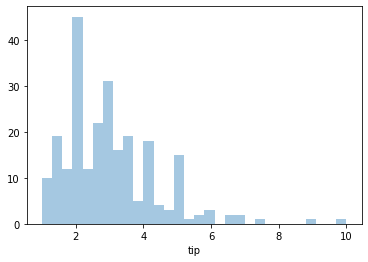

In [8]:
sns.distplot(tips['tip'], kde=False, bins=30);

### Kerner Density Estimate (KDE)

KDE is used to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable.

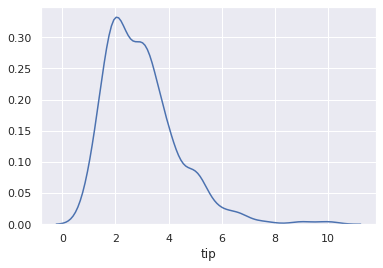

In [11]:
sns.distplot(tips['tip'],hist=False, bins=10);

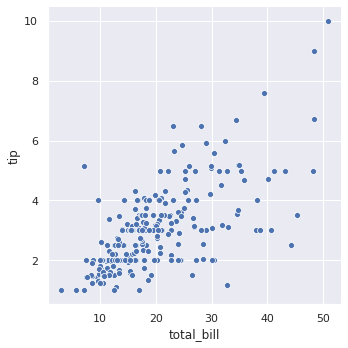

In [9]:
sns.set(style="darkgrid")
sns.relplot(x="total_bill", y="tip", data=tips);



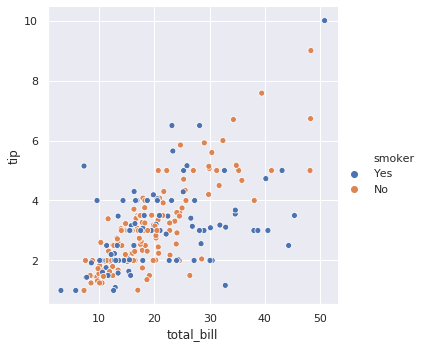

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

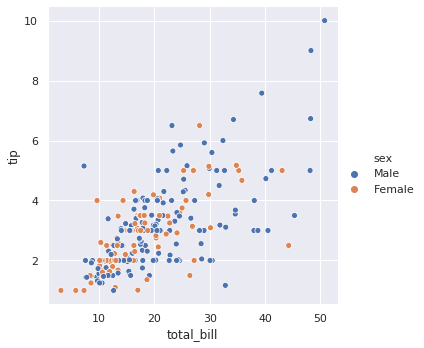

In [5]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

From the graph above for males the bigger the bill the bigger the tip.  But for females this is the case until a limit between \\$4 and \\$6 but none other than one female tipped over \\$6. 

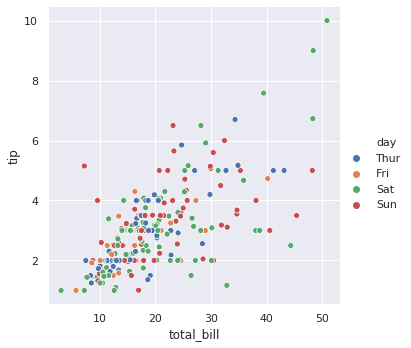

In [6]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

From graph above higher the bill ,the bigger the tip in most case , on satuday night most bills over \\$45 gave a tip \\$6 or more. And majority the tips on all nights of the week were between \\$2 and \\$4 

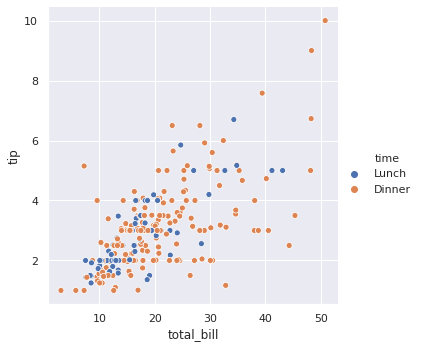

In [7]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

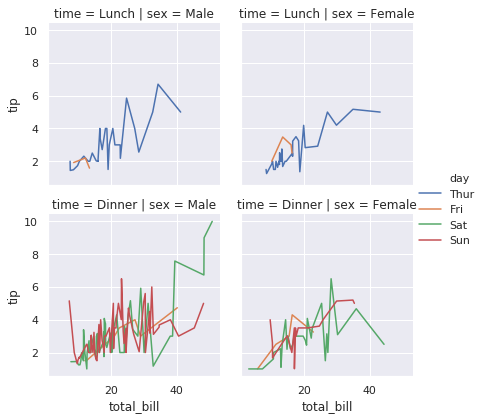

In [5]:
sns.relplot(x="total_bill", y="tip", hue="day",
            col="sex", row="time", height=3,
            kind="line", estimator=None, data=tips);

### Catergorial Variables

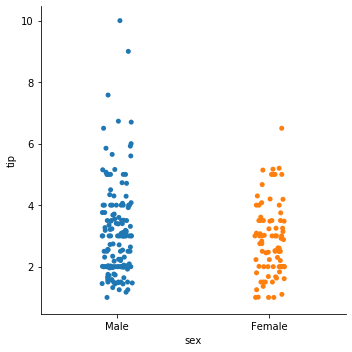

In [7]:
sns.catplot(x ="sex",y="tip",data=tips)

You can see see most tips are between 2 and 4 are both genders. And the odd male tips between 4 and 10.

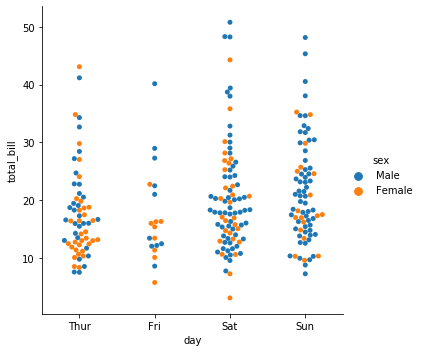

In [8]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="swarm",data=tips)

You can see from the graph above most peoples total bill is between 10 and 30 .Saturday night was the busyest . Friday was the quiestest night. Saturday and Sunday had more men than women , while Thurday and Friday were 50/50

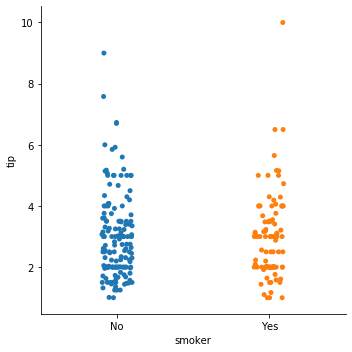

In [9]:
sns.catplot(x = "smoker",y="tip",order=["No","Yes"],data=tips)

You can see from the graph above there is no great difference in smoker and non smoker in tips 

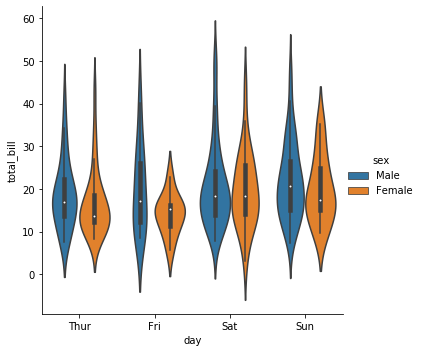

In [12]:
sns.catplot(x="day",y="total_bill",kind="violin",hue = "sex",data=tips)

 In this graph, we can see that the average amount of total_bill for females is always less than the males.[[2](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)] so total bill is dependant on sex. This also shows that odd male total is between 30 and 60

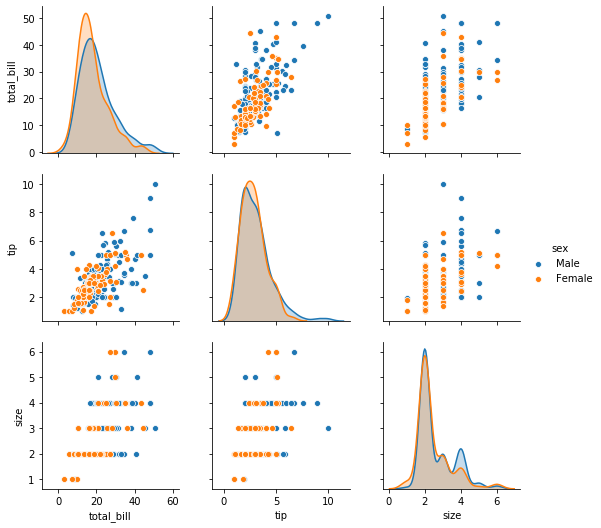

In [6]:
sns.pairplot(tips ,hue ='sex')

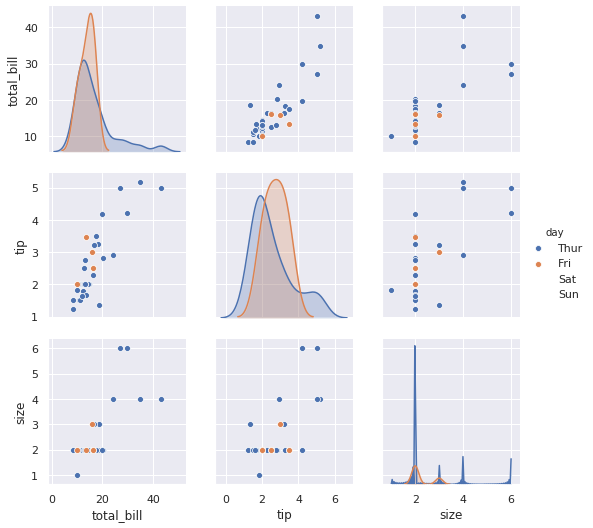

In [4]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

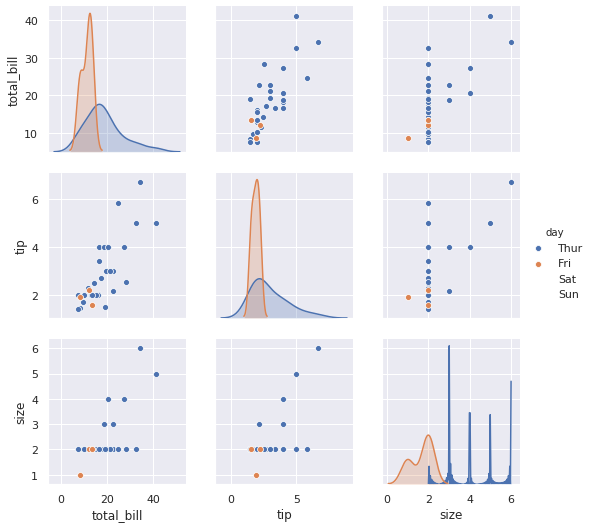

In [7]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

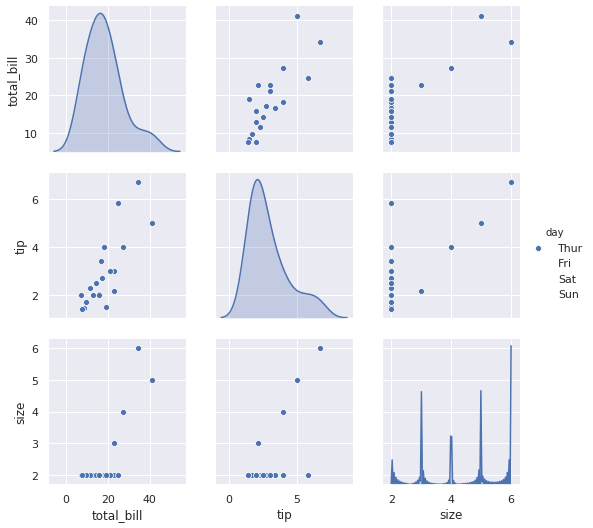

In [11]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

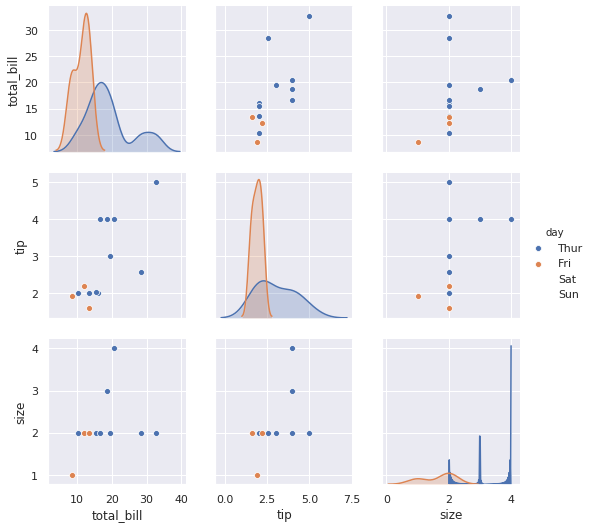

In [15]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

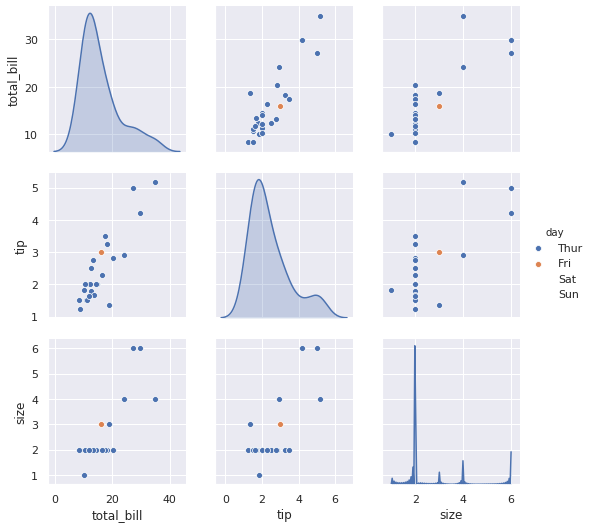

In [16]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

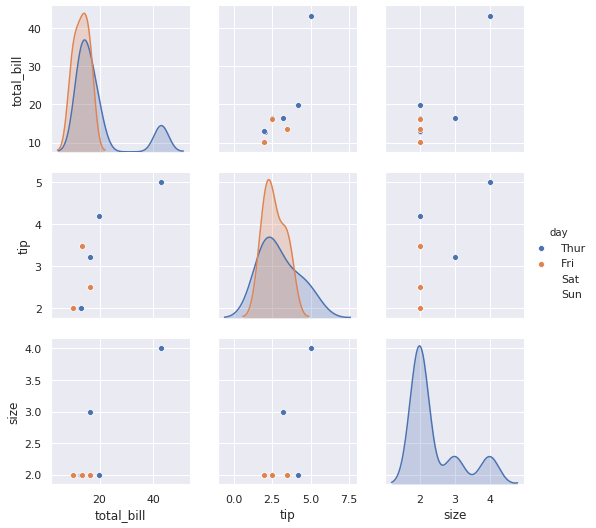

In [17]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

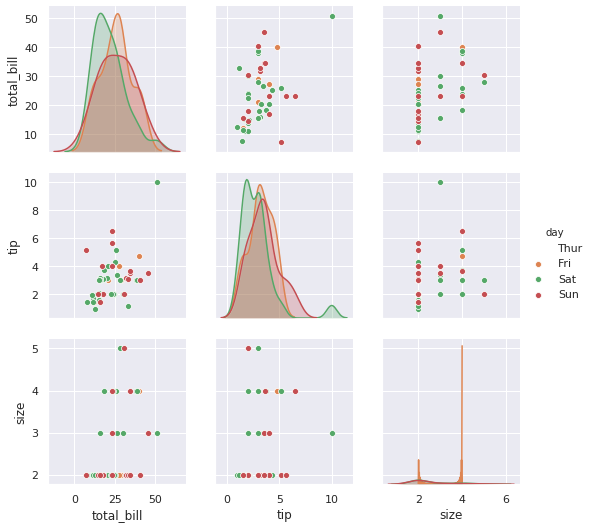

In [18]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

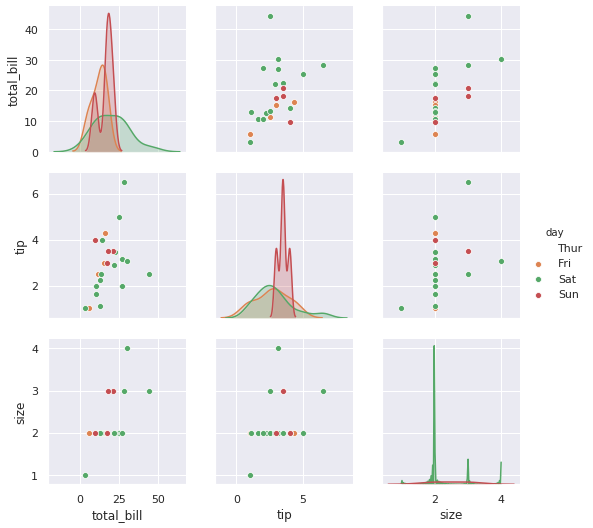

In [19]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

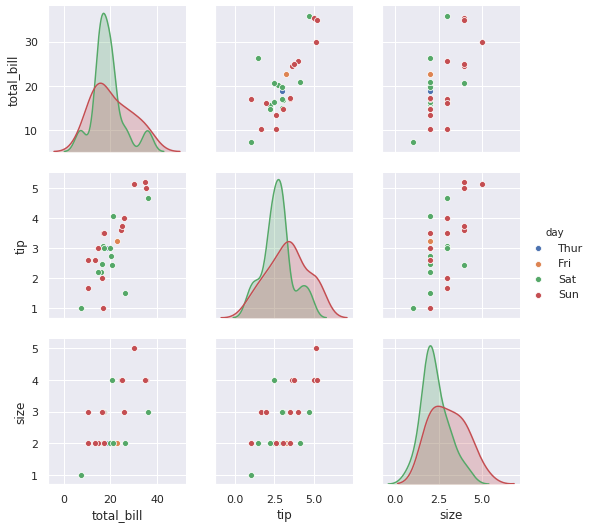

In [21]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

In [22]:
(tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')])

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
29,19.65,3.00,Female,No,Sat,Dinner,2
32,15.06,3.00,Female,No,Sat,Dinner,2


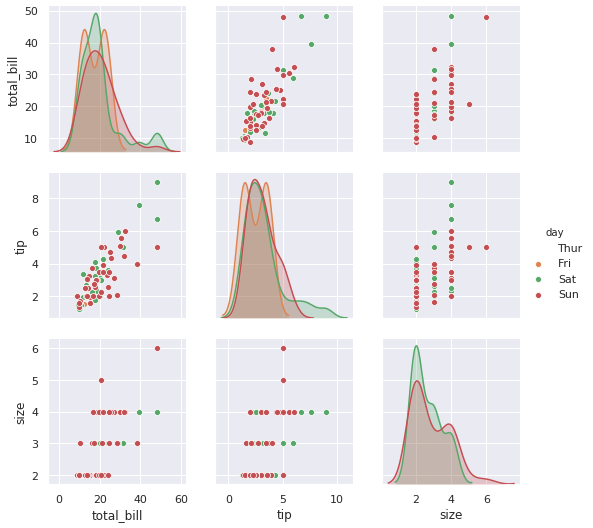

In [14]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

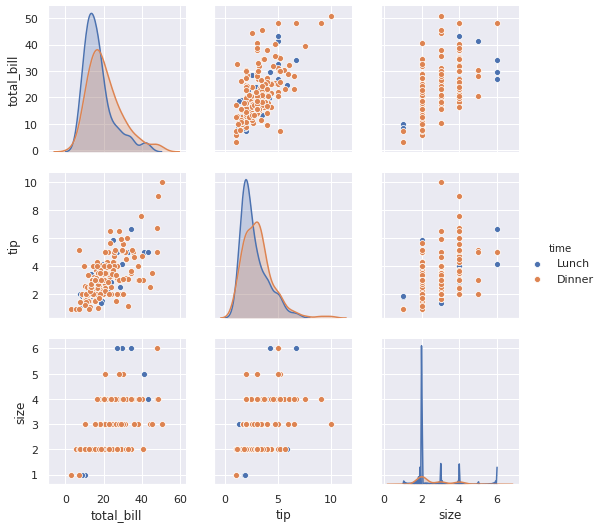

In [3]:
sns.pairplot(tips ,hue ='time')

## Regression

 For regression the function regplot is used [[3](https://seaborn.pydata.org/generated/seaborn.regplot.html)]

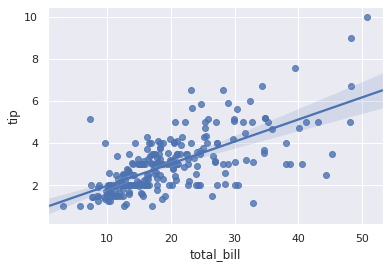

In [2]:
sns.set(color_codes=True)
ax = sns.regplot(x="total_bill", y="tip", data=tips)

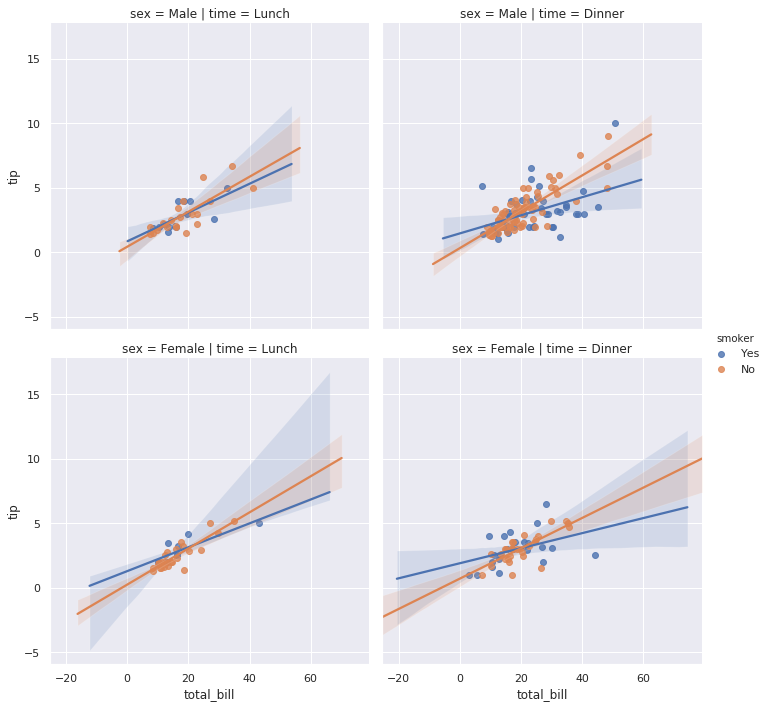

In [13]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

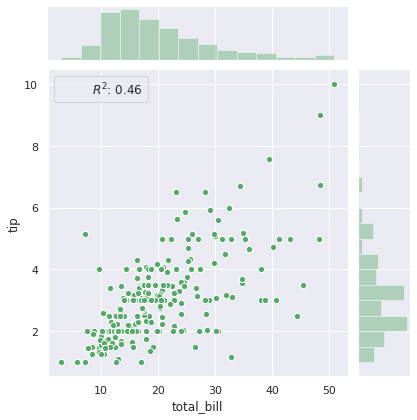

In [4]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

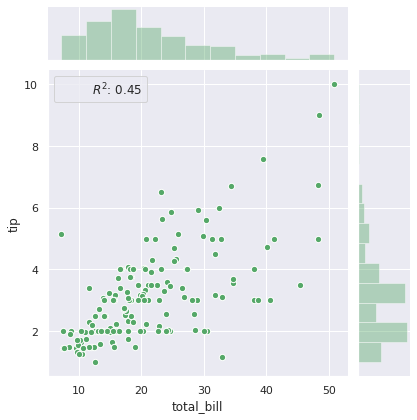

In [5]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[tips.loc[:,'sex']== 'Male']))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)


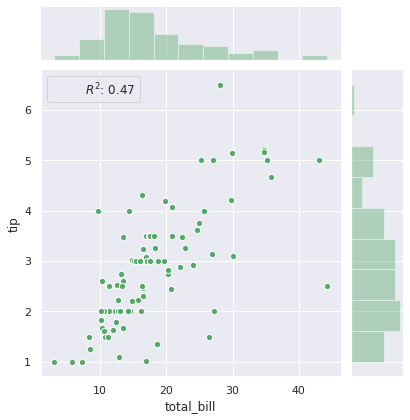

In [6]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[tips.loc[:,'sex']== 'Female']))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

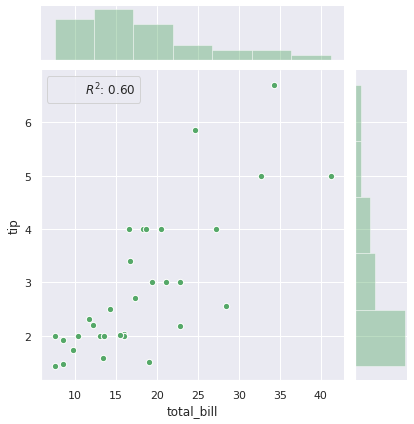

In [5]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

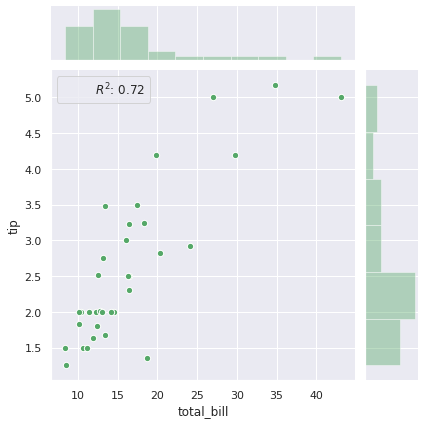

In [7]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

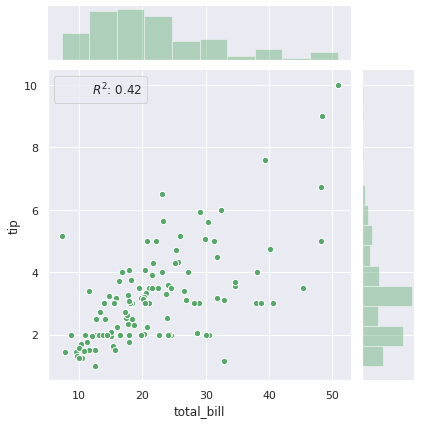

In [8]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

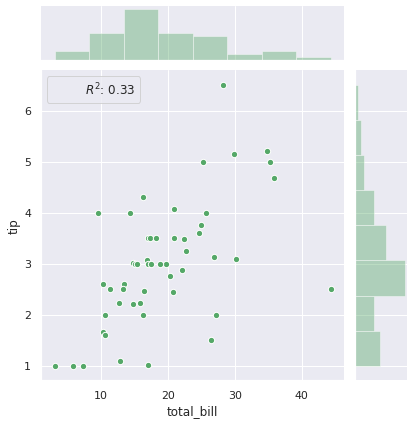

In [9]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

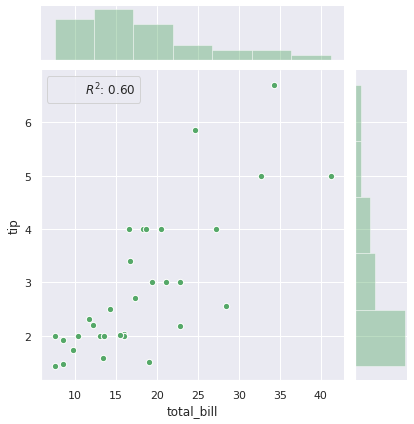

In [3]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

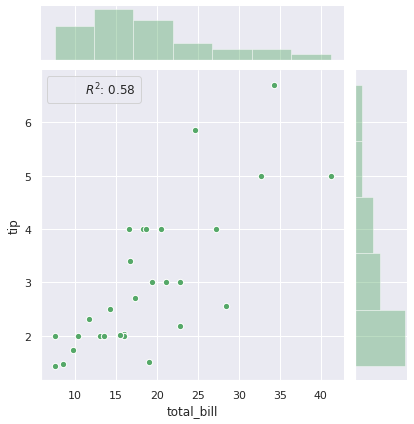

In [4]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Thur')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

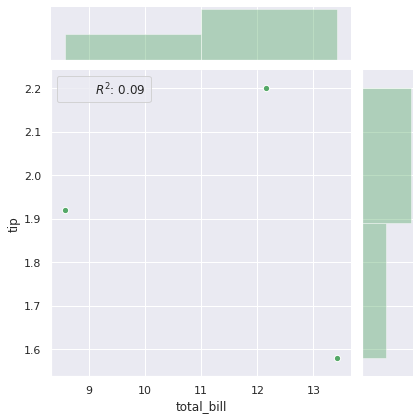

In [14]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Fri')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

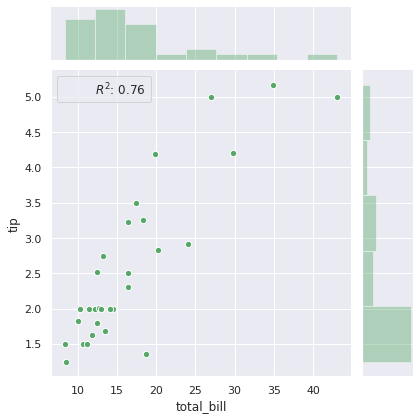

In [28]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Thur')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

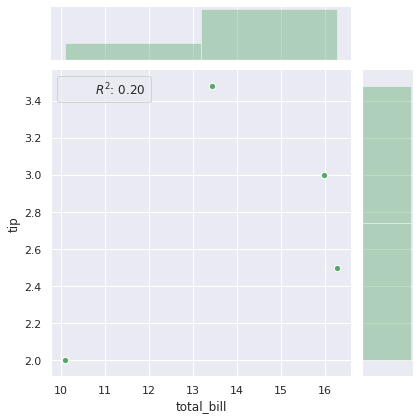

In [29]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Fri')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

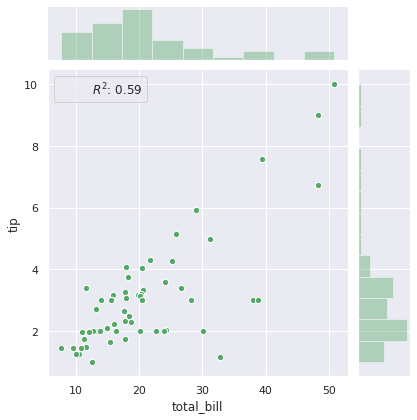

In [23]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

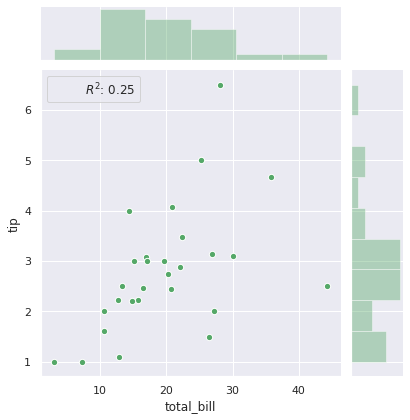

In [24]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

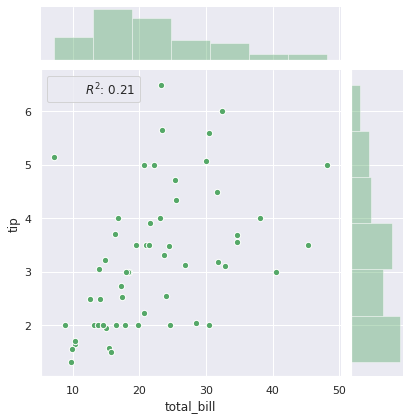

In [26]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

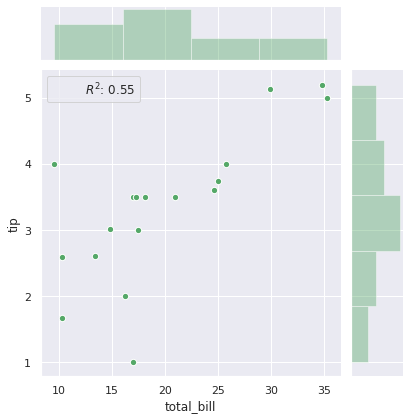

In [27]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

## Analysis

### **Referecnes**


1.  Ranjeet Jain seaborn_tips_dataset
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

2. Sanket Doshi Analyze the data through data visualization using Seaborn https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

3.  Seaborn, Seaborn.regplot, https://seaborn.pydata.org/generated/seaborn.regplot.html
